# Overview


We will kick things off with an **in class** lecture on few more administrative things (the GitHub page + groups, handing in assignments, the structure of the class). 

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend showing up in class!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

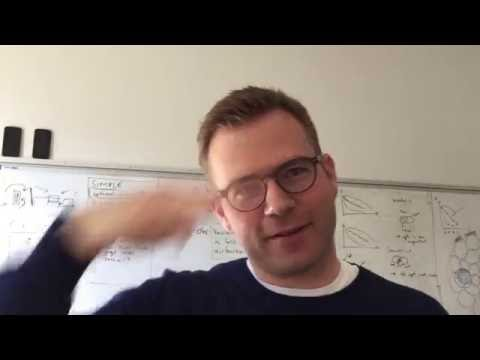

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("MMziC5xktHs",width=800, height=450) # https://www.youtube.com/watch?v=MMziC5xktHs

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
>
> * Read chapter 2\.
> 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
>

Twitter: There are many profiles/nodes in twitter with so many links to other profiles (a lot of people follows the same huge profiles). Yet these profiles does not follow them back, and there are also a lot of profiles made in twitter with only very few links.


> There are more questions on Chapter 2 below.

<div class="alert alert-block alert-info">
Just as last week, you might be tempted to use an LLM to come up with your answer. Don't! Remember what I said about the *illusion of knowledge* that you get when you take shortcuts. Don't fall into the trap. Think! Write down your own thoughts. And when you're done, you can use an LLM to make the answers better.
</div>


# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book **using `NetworkX`**

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 
>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use `NetworkX`, but simple pen and paper).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-diagonal" (all elements are away from the diagonal blocks). 
>     - *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipartite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).

<div class="alert alert-block alert-info">
The "no-LLM" idea also applies here. The idea is to try to use NetworkX to solve some problems. Give it a shot on your own. You can ask your LLM for hints if you get stuck. But don't ask for the answer. Find it yourself 😎
</div>

#### Exercise solutions

#### 2.1: 
Königsberg found that it is posible to draw the path in one go IF: There are exactly 0 or 2 nodes with an odd degree of links.
Thereby a and c is possible but not b and d.

#### 2.3 Graph representation



Plotting the two graphs:

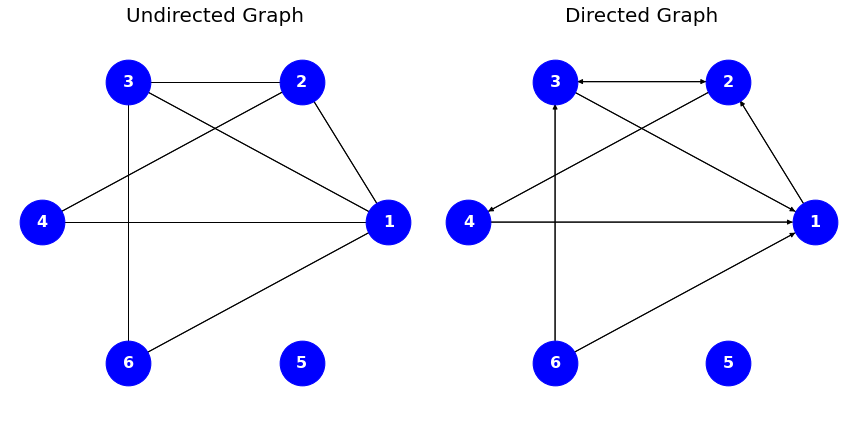

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph object
G = nx.Graph()
# Add the edges based on the image (excluding node 5, which should not be connected)
edges = [(1, 2), (1, 3), (1,4), (1, 6), 
         (2, 3), (2,4), (3, 6)]
# Add edges to the graph
G.add_edges_from(edges)
# Add node 5 without edges
G.add_node(5)


# Create a new directed graph
G_directed = nx.DiGraph()
# Define the directed edges
edges_directed = [(1, 2), (2, 4), (2,3), (3,1),(3,2),(4, 1), (6, 1), (6,3)]  # Add directions by specifying order of nodes
# Add the directed edges to the directed graph
G_directed.add_edges_from(edges_directed)
# Add node 5 without edges to the directed graph
G_directed.add_node(5)




# Draw the graph with labels
pos = nx.circular_layout(G)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the undirected graph on the left subplot
nx.draw(G_undirected, pos, with_labels=True, ax=axes[0], node_color='blue', node_size=2000,font_weight='bold', font_size=16, font_color='white')
nx.draw_networkx_edges(G_undirected, pos, ax=axes[0])
axes[0].set_title("Undirected Graph", fontsize=20)
axes[0].set_xlim(-1.2, 1.2)
axes[0].set_ylim(-1.2, 1.2)


# Plot the directed graph on the right subplot
nx.draw(G_directed, pos, with_labels=True, ax=axes[1], node_color='blue', node_size=2000,font_weight='bold', font_size=16, font_color='white', arrows=True)
nx.draw_networkx_edges(G_directed, pos, ax=axes[1], arrows=True)
axes[1].set_title("Directed Graph", fontsize=20)
axes[1].set_xlim(-1.2, 1.2)
axes[1].set_ylim(-1.2, 1.2)


# Adjust layout to avoid overlap
plt.tight_layout()

#nx.draw(G, pos, with_labels=True, node_color='blue', node_size=2000, font_weight='bold',font_size=16, font_color='white')
#nx.draw_networkx_edges(G, pos)


# Show 
plt.show()




display the adjacency matrices and the link lists of the graphs:

In [36]:
import pandas as pd
# Get the adjacency matrices
adj_matrix = nx.adjacency_matrix(G).todense()
adj_matrix_directed = nx.adjacency_matrix(G_directed).todense()

# Create link lists
link_list = {node: list(G.neighbors(node)) for node in G.nodes()}
link_list_directed = {node: list(G_directed.neighbors(node)) for node in G_directed.nodes()}

# Print the adjacency matrices
print("Adjacency Matrix for Undirected Graph:")
print(pd.DataFrame(adj_matrix, index=G.nodes(), columns=G.nodes()))

print("\nAdjacency Matrix for Directed Graph:")
print(pd.DataFrame(adj_matrix_directed, index=G_directed.nodes(), columns=G_directed.nodes()))

# Print the link lists
print("\nLink List for Undirected Graph:")
for node, neighbors in link_list.items():
    print(f"{node}: {neighbors}")

print("\nLink List for Directed Graph:")
for node, neighbors in link_list_directed.items():
    print(f"{node}: {neighbors}")


Adjacency Matrix for Undirected Graph:
   1  2  3  4  6  5
1  0  1  1  1  1  0
2  1  0  1  1  0  0
3  1  1  0  0  1  0
4  1  1  0  0  0  0
6  1  0  1  0  0  0
5  0  0  0  0  0  0

Adjacency Matrix for Directed Graph:
   1  2  4  3  6  5
1  0  1  0  0  0  0
2  0  0  1  1  0  0
4  1  0  0  0  0  0
3  1  1  0  0  0  0
6  1  0  0  1  0  0
5  0  0  0  0  0  0

Link List for Undirected Graph:
1: [2, 3, 4, 6]
2: [1, 3, 4]
3: [1, 2, 6]
4: [1, 2]
6: [1, 3]
5: []

Link List for Directed Graph:
1: [2]
2: [4, 3]
4: [1]
3: [1, 2]
6: [1, 3]
5: []


Determine the average clustering coefficient of the undirected network

In [37]:
# Compute the average clustering coefficient for the undirected graph
avg_clustering = nx.average_clustering(G)
print(f"\nAverage Clustering Coefficient for the Undirected Graph: {avg_clustering:.4f}")



Average Clustering Coefficient for the Undirected Graph: 0.6389


If you switch the labels of nodes 5 and 6, how does that move change the adjacency matrix? And the link list?
* After Switching Nodes 5 and 6: You swap the rows and columns corresponding to nodes 5 and 6.
* Switching the labels of nodes 5 and 6 will affect the neighbors listed for each node

What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?
* You can see the edge weights in the matrix but not in the link list

In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?
* a) 1
* b) 0

maybe?


#### 2.5 Bipartite Networks
Consider the bipartite network of Image 2.21

Construct its adjacency matrix. Why is it a anti-diagonal matrix?

In [52]:
import numpy as np

# Define the number of nodes in each set
num_U = 6  # Number of nodes in set U
num_V = 5  # Number of nodes in set V

# Create a zero matrix of the appropriate size
adj_matrix = np.zeros((num_U + num_V, num_U + num_V))

# Define edges between set U and set V with 1-based indexing
edges = [(1, 7), (2, 9), (3, 7), (3, 8), (3, 9), (4, 9), (4, 10), (5, 9), (6, 11)]

# Populate the adjacency matrix
for u, v in edges:
    # Adjust indices to 0-based for matrix indexing
    u_idx = u - 1
    v_idx = v - 1
    
    if u_idx < num_U and (num_U <= v_idx < num_U + num_V):
        adj_matrix[u_idx, v_idx] = 1
        adj_matrix[v_idx, u_idx] = 1  # For undirected graphs
    else:
        print(f"Edge ({u}, {v}) contains nodes outside the defined sets.")

# Print the adjacency matrix
print("Adjacency Matrix for Bipartite Graph:")
print(adj_matrix)


Adjacency Matrix for Bipartite Graph:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


* Why is it a block-diagonal matrix?

Block-Diagonal Matrix: The matrix is block-diagonal because the diagonal blocks (top-left and bottom-right) are zero matrices, representing the absence of edges within each set. The non-zero blocks are off-diagonal (top-right and bottom-left), representing edges between the two sets.

This structure reflects the nature of bipartite graphs, where edges only connect nodes between two distinct sets, not within the same set.

Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.


In [53]:
# Initialize the adjacency matrix for the projection onto U
projection_U = np.zeros((num_U, num_U), dtype=bool)

# Fill the projection matrix based on the original bipartite matrix
for i in range(num_U):
    for j in range(i + 1, num_U):  # Only fill upper triangular part to avoid duplicate edges
        if np.any(np.logical_and(adj_matrix[i, num_U:], adj_matrix[j, num_U:])):
            projection_U[i, j] = 1
            projection_U[j, i] = 1

print("Adjacency Matrix for Projection onto U:")
print(projection_U)

adj_matrix = adj_matrix.astype(bool)

# Initialize the adjacency matrix for the projection onto V
projection_V = np.zeros((num_V, num_V), dtype=bool)

# Fill the projection matrix based on the original bipartite matrix
for i in range(num_V):
    for j in range(i + 1, num_V):  # Only fill upper triangular part to avoid duplicate edges
        # Check if nodes i and j in set V have a common neighbor in set U
        if np.any(np.logical_and(adj_matrix[num_U + i, :num_U], adj_matrix[num_U + j, :num_U])):
            projection_V[i, j] = True
            projection_V[j, i] = True

print("Adjacency Matrix for Projection onto V:")
print(projection_V)



Adjacency Matrix for Projection onto U:
[[False False  True False False False]
 [False False  True  True  True False]
 [ True  True False  True  True False]
 [False  True  True False  True False]
 [False  True  True  True False False]
 [False False False False False False]]
Adjacency Matrix for Projection onto V:
[[False  True  True False False]
 [ True False  True False False]
 [ True  True False  True False]
 [False False  True False False]
 [False False False False False]]


Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.

In [54]:
# Calculate the degree of each node
degree_U = np.sum(adj_matrix[:num_U, :], axis=1)  # Degree of nodes in set U
degree_V = np.sum(adj_matrix[num_U:, :], axis=1)  # Degree of nodes in set V

# Calculate average degree
average_degree_U = np.mean(degree_U)
average_degree_V = np.mean(degree_V)

print("Average Degree of Purple Nodes (U):", average_degree_U)
print("Average Degree of Green Nodes (V):", average_degree_V)

Average Degree of Purple Nodes (U): 1.5
Average Degree of Green Nodes (V): 1.8


Calculate the average degree in each of the two network projections. 

In [55]:
# Calculate the degree of each node in the projections
degree_U_projection = np.sum(projection_U, axis=1)
degree_V_projection = np.sum(projection_V, axis=1)

# Calculate average degree
average_degree_U_projection = np.mean(degree_U_projection)
average_degree_V_projection = np.mean(degree_V_projection)

print("Average Degree of Purple Nodes (U) in Projection:", average_degree_U_projection)
print("Average Degree of Green Nodes (V) in Projection:", average_degree_V_projection)

Average Degree of Purple Nodes (U) in Projection: 2.3333333333333335
Average Degree of Green Nodes (V) in Projection: 1.6


Is it surprising that the values are different from those obtained in point (c)?

* Original Graph: The average degrees calculated in the bipartite graph reflect the connections between nodes in the two sets directly.

* Projections: The average degrees in the projections are calculated based on the new connections formed between nodes within each set after considering their common neighbors. These values may differ from those in the original graph because:

> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

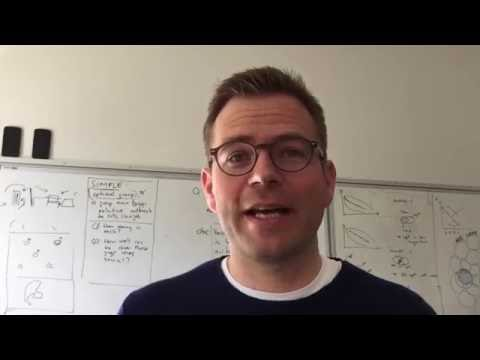

In [2]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450) # https://www.youtube.com/watch?v=iDlb9On_TDQ

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.

<div class="alert alert-block alert-info">
As I hint right above, this exercise is about you discovering nuances of binning: How defining bins that fit the data is important. How the first and last bin can sometimes be tricky. You won't discover that if you get help, so again I encourage you to try it all on your own.
</div>

> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simply specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

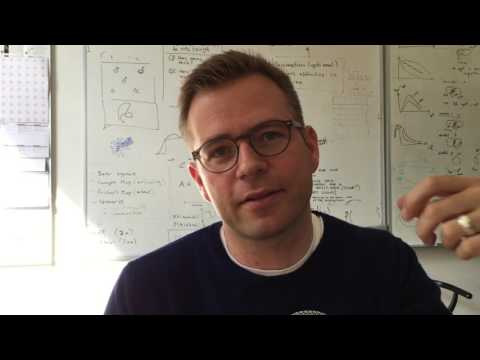

In [3]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450) # https://www.youtube.com/watch?v=c_SbQCzgqb0

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

<div class="alert alert-block alert-info">
For this exercise, I think you should solve the technical parts on your own (see above for reasons), but it's totally OK to use your LLM to make the plot look better!
</div>

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

## Homework 3.11: Erdős-Rényi Networks
*Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10^–3.*

*What is the expected number of links, 〈L〉?*
* L = (N*(N-1)/2)*p = 3000*2999*(10^-3)/2 = 4498.5
* This is the expected number of links ⟨L⟩ in the Erdős-Rényi network

*In which regime is the network? (sparse or dense)*
* If the average degree k is much smaller than N, it is sparse
* k is in this network: k = p*(N-1) = (10^-3)*2999 = 3
* Thereby is a sparse network

*Calculate the probability pc so that the network is at the critical point*
* pc = 1/(N-1) = 0,0003333 (min threshold that ensures that the network is connected)
* This value is indeed much smaller than p (10^-3 = 0.001). Therefore, for ensuring connectivity, the network is already above the connectivity threshold 

*(d) Given the linking probability p = 10–3, calculate the number of nodes Ncr so that the network has only one component. (is fully connected)*
* p = 1/(N-1) <=> N = (1/p) + 1
* Dvs N = 1/0.001 + 1 = 1001
* For a ER network with p = 0.001, the number of nodes Ncr required for the network to be connected is 1001
* And ours is 3000, so it is good

*For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.*
* Average degree: k = p*(N-1) = 0.001*(1001-1) = 1
* Average distance between two nodes: d = ln(N)/ln(k) = ln(1001)/ln(1) = ln(1001)/0...

*Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).*
* Poission distribution: pk = the probability that a randomly chosen node has degree k
* pk = ((k^k) * exp(-k))/k!
* For k = 1: pk = ((1^1) * exp(-1))/1! = exp(-1) = 0.3679

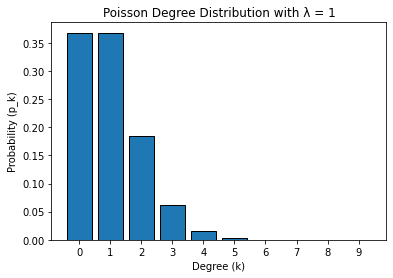

In [61]:
from scipy.special import factorial
# Average degree
lambda_k = 1

# Range of degree values to calculate probabilities for
k_values = np.arange(0, 10)  # Adjust range as needed

# Calculate Poisson probabilities for each k
p_k = (lambda_k**k_values * np.exp(-lambda_k)) / factorial(k_values)

# Plotting the degree distribution
plt.bar(k_values, p_k, width=0.8, edgecolor='black')
plt.xlabel('Degree (k)')
plt.ylabel('Probability (p_k)')
plt.title('Poisson Degree Distribution with λ = {}'.format(lambda_k))
plt.xticks(k_values)
plt.show()

### Paths
*Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).*

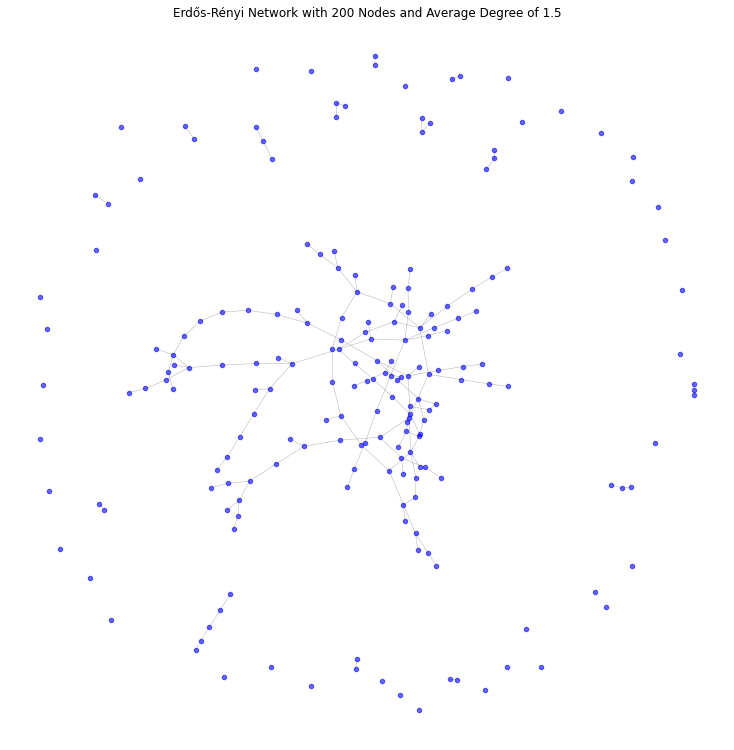

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
N = 200  # Number of nodes
average_degree = 1.5

# Calculate probability p for the Erdős-Rényi model
p = average_degree / (N - 1)

# Generate the Erdős-Rényi graph
G = nx.erdos_renyi_graph(N, p)

# Plotting
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout

# Draw the graph
nx.draw(
    G, 
    pos, 
    with_labels=False, 
    node_size=20,  # Shrink node size
    node_color='blue', 
    edge_color='gray', 
    alpha=0.6, 
    font_size=10,
    width=0.5
)

plt.title('Erdős-Rényi Network with 200 Nodes and Average Degree of 1.5')
plt.show()


*Extract the Giant Connected Component, GCC. (Hint: You can use networkx.connected_component_subgraphs <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use nx.connected_components(G) and G.subgraph(c).copy())*

*Choose a node at random from the GCC. (Hint: You may want to try random.choice.)*

*Find all nodes that are precisely 2 steps away from that chosen random node. (Hint. I suggest networkx.single_source_shortest_path_length)*

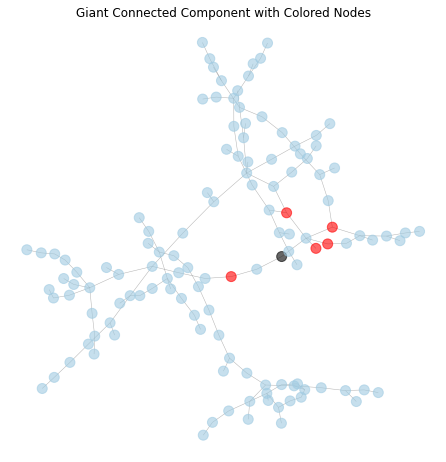

In [80]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Extract connected components
components = list(nx.connected_components(G))

# Find the largest connected component (Giant Connected Component)
gcc = max(components, key=len)
GCC = G.subgraph(gcc).copy()

# Choose a random node from the GCC
random_node = random.choice(list(GCC.nodes()))

# Find shortest path lengths from the random node
shortest_paths = nx.single_source_shortest_path_length(GCC, random_node)

# Assign colors based on distance
node_colors = {}
for node, distance in shortest_paths.items():
    if node == random_node:
        node_colors[node] = "#000000"  # Black for the starting node
    elif distance == 2:
        node_colors[node] = "#ff0000"  # Red for nodes 2 steps away
    else:
        node_colors[node] = "#A0CBE2"  # Blue for all other nodes

# Plotting the Giant Connected Component
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(GCC, seed=42)  # Position nodes using the spring layout

# Draw the graph with specified node colors
nx.draw(
    GCC, 
    pos, 
    with_labels=False, 
    node_size=100,  # Adjust node size
    node_color=[node_colors.get(node, "#A0CBE2") for node in GCC.nodes()],  # Use colors from the dictionary
    edge_color='gray', 
    alpha=0.6, 
    font_size=10,
    width=0.5
)

plt.title('Giant Connected Component with Colored Nodes')
plt.show()
